<a href="https://colab.research.google.com/github/LH-1169213/Equipo3/blob/main/Arboldedecision_Equipo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Samara García González A01273001

*   Laura Elena Hernández Mata A01169213
*   Evelyn Aylin Rendon Medina A01748750

*   Emmanuel González Calitl A01320739
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [42]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #borrar si no se usa
import seaborn as sns #borrar si no se usa

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split # Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=0.15, random_state=0)
from sklearn.preprocessing import StandardScaler   #borrar si no se usa
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import  cross_validate

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import recall_score #SÓLO PARA VALIDACIÓN
from sklearn.metrics import f1_score #SÓLO PARA VALIDACIÓN
from sklearn.metrics import make_scorer #SÓLO PARA VALIDACIÓN
from imblearn.metrics import geometric_mean_score #SÓLO PARA VALIDACIÓN
from sklearn.metrics import confusion_matrix #SÓLO PARA VALIDACIÓN

from sklearn import svm, datasets #borrar si no se usa
from sklearn.model_selection import GridSearchCV
from sklearn import tree


#**Ejercicio-1.** 

## Carga los datos

In [3]:
#OBTENIENDO DATASET
DataOriginal = pd.read_csv("https://raw.githubusercontent.com/LH-1169213/Equipo3/main/SouthGermanCredit.asc",sep = " ")
DataOriginal.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


## Sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.

In [4]:
#HACEMOS UNA COPIA PARA CAMBIAR HEADERS
df = DataOriginal
df = df.rename(columns={"laufkont":"status",
                        "laufzeit":"duration",
                        "moral":"credit_history",
                        "verw":"purpose",
                        "hoehe":"amount",
                        "sparkont":"savings",
                        "beszeit":"employment_duration",
                        "rate":"installment_rate",
                        "famges":"personal_status_sex",
                        "buerge":"other_debtors",
                        "wohnzeit":"present_residence",
                        "verm":"property",
                        "alter":"age",
                        "weitkred":"other_installment_plans",
                        "wohn":"housing",
                        "bishkred":"number_credits",
                        "beruf":"job",
                        "pers":"people_liable",
                        "telef":"telephone",
                        "gastarb":"foreign_worker",
                        "kredit":"credit_risk"})
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [5]:
# CONOCIENDO EL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

#**Ejercicio-2.**

## Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida. 

In [66]:
# DEFINICIÓN DE VARIABLES

X = df.iloc[:,0:20] #Variables de entrada 
y = df["credit_risk"] #VARIABLE DE SALIDA


## Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%.

In [68]:
# PARTICIÓN DE DATOS (ENTRENAMIENTO 85%, PRUEBA 15%)

Xtrain, Xtest, Ytrain, Ytest =  train_test_split(X,y, test_size = 0.15,shuffle = False)

#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:

## 3a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable

In [69]:
# DIVISIÓN DE VARIABLES EN CATEGÓRICA, ORDINAL, NUMÉRICA Y BINARIA

categorical_vars = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing'] #Variables categóricas
ordinal_vars = ['employment_duration','installment_rate','present_residence','property','number_credits','job'] #Variables cuantitativas discretizadas
quantitative_vars = ['duration','amount','age'] #Variables numéricas
binary_vars = ['people_liable','telephone','foreign_worker'] #Variables binarias
binary_out = ['credit_risk'] #Variable de salida, tipo binaria

In [70]:
# BÚSQUEDA DE NULOS

df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [71]:
df.replace('?', np.nan, inplace=True)

In [72]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [73]:
df.replace(' ', np.nan, inplace=True)

In [74]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [75]:
# NO ENCONTRAMOS VALORES VACÍOS, NI "?", NI ATÍPICOS, SIN EMBARGO, DECIDIMOS COLOCAR 
# UN PASO DE IMPUTACIÓN CON LA FINALIDAD DE ESTRUCTURAR EL PROCESO PARA PREVENIRLO EN
# CASO DE QUE SE PRESENTE CUANDO SE INTEGRE MÁS INFORMACIÓN EN EL FUTURO.

# IMPUTACIÓN DE DATOS

# SE DECIDIÓ IMPUTAR VARIABLES CUANTITATIVAS CON PROMEDIO, YA QUE ESTO EVITARÍA EL SESGO EN NUESTRO MODELO
imputed_quantitative = SimpleImputer(strategy='mean')
imputed_quantitative = imputed_quantitative.fit_transform(Xtrain[quantitative_vars], Ytrain)

# SE OPTÓ POR LA MODA PARA VARIABLES CATEGÓRICAS, YA QUE AL SER LA OPCIÓN MÁS FRECUENTE DISMINUYE EL SESGO EN EL MODELO
imputed_categorical = SimpleImputer(strategy='most_frequent')
imputed_categorical = imputed_categorical.fit_transform(Xtrain[categorical_vars], Ytrain)

# LA IMPUTACIÓN PARA VARIABLES BINARIAS, AL IGUAL QUE LAS CATEGÓRICAS, SE REALIZA POR MODA PARA DISMINUIR EL SESGO
imputed_binary = SimpleImputer(strategy='most_frequent')
imputed_binary = imputed_binary.fit_transform(Xtrain[binary_vars], Ytrain)

## 3 b&c. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable. Aplica la transformación One-Hot encoding  a las variables de entrada de tipo categórico y binaria.

In [76]:
# PIPELINE, ESCALACIÓN DE DATOS CUANTITATIVOS CON EL MÉTODO DE MinMaxScaler, Y
# TRANSFORMACIÓN ONE HOT ENCODER PARA VARIABLES CATEGÓRICAS Y BINARIAS.

quantitative_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler',MinMaxScaler())])
col_quantitative = quantitative_vars

categorical_pipeline = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown="ignore"))])
col_categorical = categorical_vars

binary_pipeline = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown="ignore"))])
col_binary = binary_vars

cols_Transformer = ColumnTransformer(transformers = [('quantitative', quantitative_pipeline, col_quantitative),
                                                        ('categorical', categorical_pipeline, col_categorical),
                                                        ('binary', binary_pipeline, col_binary)
                                                        ], remainder='passthrough')

In [77]:
#REVISIÓN DE CONFIGURACIÓN
X_train_fit = cols_Transformer.fit(Xtrain)
print(X_train_fit)

ColumnTransformer(remainder='passthrough',
                  transformers=[('quantitative',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['duration', 'amount', 'age']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['status', 'credit_history', 'purpose',
                                  'savings', 'personal_status_sex',
                                  'other_debtors', 'other_installment_plans',
                                  'housing']),
                                ('binary',
                      

## 3c. Justifica por qué una variable binaria requeriría que se le aplique  la transformación one-hot encoding.

***El One-hot enconding lo que hace es transformar las variables categóricas en columnas dummy binarias (es decir si cumplen con el valor o no). Si bien las variables binarias ya cumplen con estas características, el One-hot enconding también es útil para mejorar las predicciones y rendimiento del modelo. Por lo tanto, la justificación de aplicar One-hot encoding para variables binarias es que ayudaremos a la escalabilidad de la información y a mejorar la eficiencia del modelo.***

#**Ejercicio-4.**

Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las 
siguientes características: 

## 4 a-c. Usa los parámetros predeterminados de cada modelo. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones. 

In [78]:
def get_models():
  
  modelos = list()
  nombres = list()

  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  return modelos, nombres

In [81]:
#Métricas valores de Entrenamiento:

#FUNCIÓN ACCURACY
def accuracyFunction(Yreal, Yestimada):
  vn, fp, fn, vp = confusion_matrix(Yreal, Yestimada).ravel()
  accuracy = (vp+vn)/(vp+vn+fp+fn)
  return accuracy
#FUNCION PRECISIÓN 
def precisionFunction(Yreal, Yestimada):
  vn, fp, fn, vp=confusion_matrix(Yreal, Yestimada).ravel()
  precision = vp / ( vp+fp)
  return precision
#FUNCIÓN RECALL
def recallFunction(Yreal, Yestimada):
  vn, fp, fn, vp=confusion_matrix(Yreal, Yestimada).ravel()
  recall = vp / (vp+fn)
  return recall
#FUNCIÓN F1 SCORE
def f1Function(Yreal, Yestimada):
  vn, fp, fn, vp=confusion_matrix(Yreal, Yestimada).ravel()
  f1score = 2*vp / (2*vp+fp+fn)
  return f1score
#FUNCIÓN ESPECIFICIDAD
def especificidadFunction(Yreal, Yestimada):
  vn, fp, fn, vp=confusion_matrix(Yreal, Yestimada).ravel()
  especificidad = vn / (vn+fp)
  return especificidad
#FUNCIÓN GMEAN
def gmeanFunction(Yreal, Yestimada):
 vp, fp, fn, vp=confusion_matrix(Yreal, Yestimada).ravel()
 gmean = np.sqrt(recallFunction(Yreal, Yestimada) * especificidadFunction(Yreal, Yestimada))
 return gmean


## 4d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”.

In [86]:
modelos, nombres = get_models()
resultados = list()

for i in range(len(modelos)):

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('ct',cols_Transformer),('m',modelos[i])])

  mismetricas = {
      "accuracy": make_scorer(accuracyFunction),
      "precision": make_scorer(precisionFunction),
      "recall": make_scorer(recallFunction),
      "f1score": make_scorer(f1Function),
      "gmean": make_scorer(gmeanFunction)
  }

  resultadosOU = cross_validate(pipeline, Xtrain, Ytrain, scoring=mismetricas, cv=kfold, return_train_score=True)
  resultados.append(resultadosOU)

  print("\nEntrenamiento:") 
  print('\n%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i], 
                                                                          np.mean(resultadosOU['train_accuracy']), 
                                                                          np.std(resultadosOU['train_accuracy']),  
                                                                          np.mean(resultadosOU['train_precision']), 
                                                                          np.std(resultadosOU['train_precision']), 
                                                                          np.mean(resultadosOU['train_recall']), 
                                                                          np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_f1score']), 
                                                                          np.std(resultadosOU['train_f1score']), 
                                                                          np.mean(resultadosOU['train_gmean']), 
                                                                          np.std(resultadosOU['train_gmean']) ))
  print("\nPrueba:") 
  print('\n%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']), 
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),
                                                                          np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']) ))


Entrenamiento:

LR:
mean Accuracy: 0.847 (0.0064)
mean Precision: 0.860 (0.0057)
mean Recall: 0.972 (0.0045)
mean F1score: 0.913 (0.0034)
Gmean: 0.503 (0.0361)


Prueba:

LR:
mean Accuracy: 0.817 (0.0211)
mean Precision: 0.846 (0.0143)
mean Recall: 0.951 (0.0140)
mean F1score: 0.895 (0.0119)
Gmean: 0.416 (0.0936)


Entrenamiento:

DT:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)


Prueba:

DT:
mean Accuracy: 0.753 (0.0394)
mean Precision: 0.856 (0.0204)
mean Recall: 0.840 (0.0376)
mean F1score: 0.848 (0.0259)
Gmean: 0.532 (0.0772)


Entrenamiento:

RF:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)


Prueba:

RF:
mean Accuracy: 0.836 (0.0118)
mean Precision: 0.842 (0.0090)
mean Recall: 0.987 (0.0097)
mean F1score: 0.909 (0.0064)
Gmean: 0.355 (0.0865)



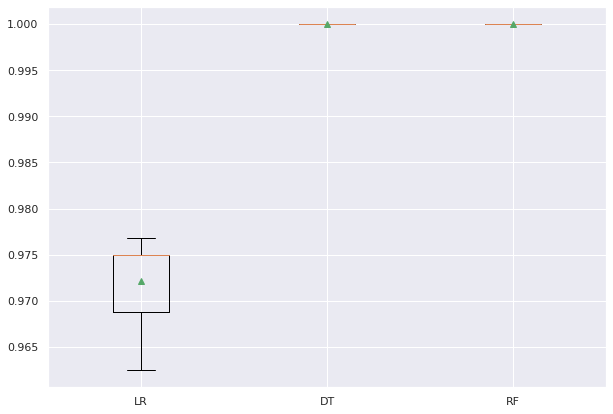

In [88]:
#DIAGRAMA DE CAJAS Y BIGOTES ENTRENAMIENTO
sns.set(rc={'figure.figsize':(10,7)})

Aux = list()
for i in range (len(resultados)):
  box = resultados[i]['train_recall']
  Aux.append(box)
plt.boxplot(Aux, labels=nombres, showmeans=True)

plt.show()

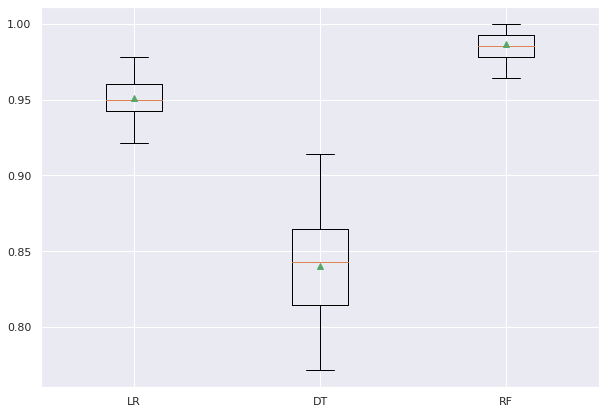

In [89]:
#DIAGRAMA DE CAJAS Y BIGOTES DE VALIDACIÓN
sns.set(rc={'figure.figsize':(10,7)})

Aux = list()
for i in range (len(resultados)):
  box = resultados[i]['test_recall']
  Aux.append(box)
plt.boxplot(Aux, labels=nombres, showmeans=True)

plt.show()

# 4d. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta. 

***Sí, los modelos de árbol de decisión y bosque aleatorio están sobreentrenados, ya que en la media y desviación estándar los resultados en el entrenamiento se aprecian como 1 y 0 respectivamente, lo cual quiere decir que se está ajustando al 100% a los valores de entrada. Por su parte, el de regresión logística parece que está subentrenado, en tanto que los resultados de las métricas tales la desviación estándar incrementa considerablemente al correr el modelo en los datos de validación. Igualmente, al revisar el box plot con los datos de validación, se puede apreciar que las cajas para Regresión Logística y para Bosque aleatorio están muy compactas y por arriba del 90%. En el modelo de Árbol de Decisión, la caja está más amplia. Considerando la relación de las cajas y bigotes con la curva normal, se puede apreciar que el conjunto de datos para Regresión Logística y Bosque aleatorio se encuentra muy cercano a la media; en cambio, para el Árbol de decisión, tendríamos una curva mucho más aplanada, por lo que podría haber mayor desviación en los datos.***

## 4e. Obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos.

4ei. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”. 

In [93]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Scoring')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [94]:
def mi_ModeloYCurvas(Xin):

       modelo = LogisticRegression(max_iter=3000, random_state=1)
       MODELS_pipe = Pipeline(steps = [('tranformación', cols_Transformer),("LR", modelo)])

       kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

       delta_train_sz = np.linspace(0.1, 1.0, 20)

       tr_sizes, tr_scores, val_scores = learning_curve(n_jobs = -1,
                                                        estimator = MODELS_pipe ,    
                                                        X = Xin,
                                                        y = Ytrain.values.ravel(),
                                                        cv = kfold,
                                                        train_sizes = delta_train_sz, 
                                                        scoring = make_scorer(f1Function))
       
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo lineal:


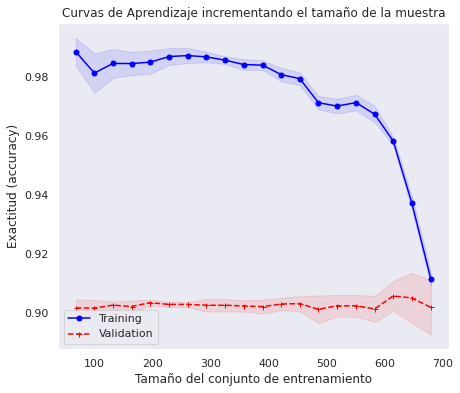

In [92]:
# MODELO DE REGRESIÓN LOGÍSTICA

print('Curvas de aprendizaje del modelo lineal:')
mi_ModeloYCurvas(Xtrain)

4eii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo. 

In [24]:
def create_validation_curve (x_val,y_val,param_name,cv_entrada,scoring):
  modelo = DecisionTreeClassifier()
  pipe = Pipeline(steps=[("Preparainfo",cols_Transformer),("model",modelo)])
  rango_param = np.linspace(1, 20, 20,dtype="int")
  t_scores, v_scores = validation_curve(n_jobs = -1,
      estimator=pipe,
      X=x_val, y=y_val, 
      param_name=f"model__{param_name}",
      param_range=rango_param, cv=cv_entrada, 
      scoring=scoring,
  )

  return rango_param, t_scores, v_scores

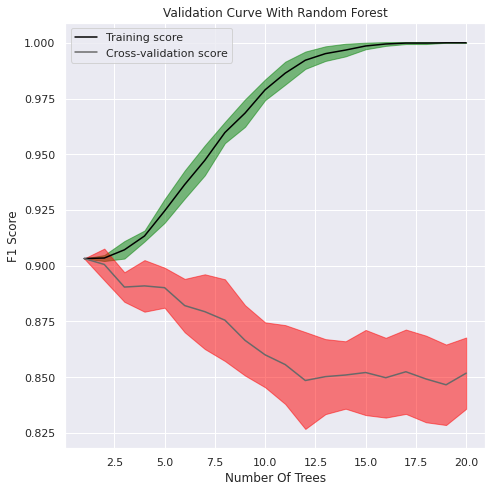

In [25]:
from scipy.stats import alpha
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

param_range,train_score, validation_score = create_validation_curve(Xtrain,Ytrain,"max_depth",kfold,make_scorer(f1Function))
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(validation_score, axis=1)
test_std = np.std(validation_score, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="green",alpha=0.5)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red",alpha=0.5)
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

4eiii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo. 


In [96]:
def CurvaRF(Xin):
  RF = RandomForestClassifier() 
  pipe = Pipeline(steps=[("PreparaInfo", cols_Transformer),("RF", RF)])
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)  
  delta_train_sz = np.linspace(.1, 1, 20)
  tr_sizes, tr_scores, val_scores = learning_curve(n_jobs = -1,
                                                   estimator = pipe ,    
                                                   X = Xin,
                                                   y = Ytrain.values.ravel(),
                                                   cv = kfold,
                                                   train_sizes = delta_train_sz ,
                                                   scoring=make_scorer(recallFunction))

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

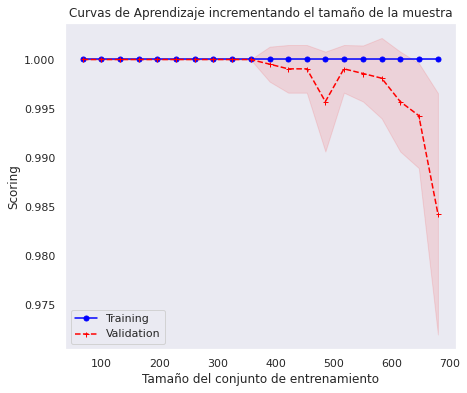

In [97]:
CurvaRF(Xtrain)

#**Ejercicio-5.**

## Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. 

Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas. Puedes consultar su documentación de GridSearchCV en la siguiente liga:  

[texto del enlace](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html )
 

## 5a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). 
Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. 

Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. 

NOTA: Toma en cuenta que no todas las combinaciones de solver” y “penalty” son posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación. 

In [98]:
modelo_CV = LogisticRegression(max_iter=9000, random_state=1) 
mi_pipeCV = Pipeline(steps=[("PreparaInfo", cols_Transformer),("model", modelo_CV)])
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
parametroC= [0.01, 0.1, 1, 10, 100, 1000]
ParametrosGR = [{'model__penalty': ['l1'], 'model__solver': [ 'saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC},
                  {'model__penalty': ['l2'], 'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC},
                  {'model__penalty': ['elasticnet'], 'model__solver': ['saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC, 'model__l1_ratio': [0.5]},
                 ]

gridFinal=  GridSearchCV (n_jobs = -1,
                          estimator =  mi_pipeCV, 
                          param_grid = ParametrosGR,
                          scoring = make_scorer(f1Function),
                          cv = mi_kfoldCV)

gridFinal.fit(Xtrain, np.ravel(Ytrain))
best_score = gridFinal.best_score_
best_param = gridFinal.best_params_
print("El mejor score es:", best_score)
print("El mejor parámetro es:", best_param)

El mejor score es: 0.9041764148292545
El mejor parámetro es: {'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'sag'}


# 5a. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.

***Recordando que F1 Score incluye a las métricas recall y precisión, esto nos ayuda a entender que tenemos buenos valores en las anteriores métricas ya que tenemos un F1 Score de 0.9 es la combinación de ambas. Lo que indica que realmente los hiperparámetros obtenidos sí son los mejores en cuanto al F1 Score, que se buscó a través del método GridSearch. En este sentido, es muy útil hacer uso de esta métrica ya que permite relaciónar recall y precisión en una misma ejecutión.***

# 5b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

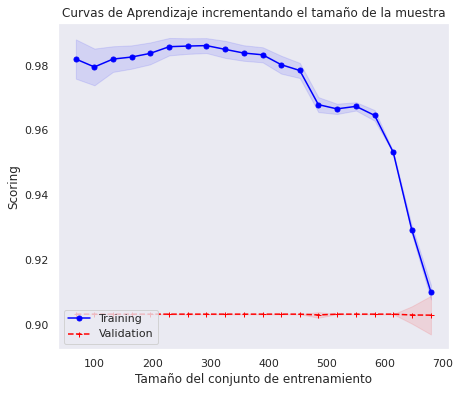

In [99]:
def graf_CV (Xin, parametro_C, penalizacion, resolutor):
  modelo_CV = LogisticRegression(C=parametro_C, solver=resolutor, penalty=penalizacion, max_iter=8000, random_state=1)
  pipe_CV = Pipeline(steps=[("PreparaInfo", cols_Transformer),("RegresionLogistica", modelo_CV)])
  kfold_CV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  train_size_CV = np.linspace(0.1, 1.0, 20)
  tr_sizes, tr_scores, val_scores = learning_curve(n_jobs = -1,
                                                   estimator = pipe_CV ,    
                                                   X = Xin,
                                                   y = Ytrain.values.ravel(),
                                                   cv = kfold_CV,
                                                   train_sizes = train_size_CV ,
                                                   scoring=make_scorer(f1Function))

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

graf_CV(Xtrain, 0.1,'l2','saga')

## 5c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). 

Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”.  

In [ ]:
modelo_CV = DecisionTreeClassifier() 
mi_pipeCV = Pipeline(steps=[("PreparaInfo", cols_Transformer),("model", modelo_CV)]) 
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

ParametrosGR = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],  
              'model__criterion': ['gini', 'entropy'], 
              'model__max_depth':[2, 4, 6, 8, 10, 12], 
              'model__min_samples_split':[2, 4, 6,8,10], 
              'model__class_weight': ['balanced', None]}

ArbolFinal=  GridSearchCV (n_jobs = -1,
                           estimator =  mi_pipeCV, 
                           param_grid = ParametrosGR,
                           scoring = make_scorer(precisionFunction),
                           cv = mi_kfoldCV)
ArbolFinal.fit(Xtrain, np.ravel(Ytrain))

## 5c. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”.

In [ ]:
best_score = ArbolFinal.best_score_
best_param = ArbolFinal.best_params_
print("El mejor score es:", best_score)
print("El mejor parámetro es:", best_param)

## 5c. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones. 

***La métrica de precisión puede se puede interpretar como el porcentaje que es correcto en relación a lo pronosticado como positivo. Lo cual en nuestro score con los anteriores parámetros optimizados es de 0.9, que indica que se tiene una alta confiabilidad ya que las predicciones tienen una alta probablidad de que sean correctas. Sin embargo, se sugiere revisar más métricas como el recall o F1 Score para concluir correctamente el desempeño total del modelo.***

## 5d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de pecisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. 

Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

In [ ]:
def mi_curvaRF(Xin2):
  modeloDT2 = DecisionTreeClassifier(ccp_alpha=ArbolFinal.best_params_.get('model__ccp_alpha'),
                                     criterion=ArbolFinal.best_params_.get('model__criterion'),
                                     max_depth=ArbolFinal.best_params_.get('model__max_depth'),
                                     min_samples_split=ArbolFinal.best_params_.get('model__min_samples_split')) 
   
  mi_pipe = Pipeline(steps=[("PreparaInfo", cols_Transformer),("ModeloDecisionTree", modeloDT2)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)  
  delta_train_sz = np.linspace(.1, 1, 20) 
  tr_sizes, tr_scores, val_scores = learning_curve(n_jobs = -1,
                                                   estimator = mi_pipe ,    
                                                   X = Xin2,
                                                   y = Ytrain,
                                                   cv = mi_kfold ,
                                                   train_sizes = delta_train_sz ,
                                                   scoring=make_scorer(precisionFunction)) 
  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores) 
mi_curvaRF(Xtrain)

## 5e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. 

NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo  

In [ ]:
modelo_CV = RandomForestClassifier() 
mi_pipeCV = Pipeline(steps=[("PreparaInfo", cols_Transformer),("model", modelo_CV)]) 
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

ParametrosGRRF = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],  
              'model__criterion': ['gini', 'entropy'], 
              'model__max_depth':[2, 4, 6, 8, 10, 12], 
              'model__min_samples_split':[2, 4, 6,8,10], 
              'model__class_weight': ['balanced', None]}

BosqueFinal=  GridSearchCV (n_jobs = -1,
                            estimator =  mi_pipeCV, 
                            param_grid = ParametrosGRRF,
                            scoring = make_scorer(recallFunction),
                            cv = mi_kfoldCV)
BosqueFinal.fit(Xtrain, np.ravel(Ytrain))

print("best_score:", BosqueFinal.best_score_)
print("best_param:", BosqueFinal.best_params_)

## 5e. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones.  

***La métrica Recall mide cuantos valores verdaderamente correctos dentro de todos sus valores positivos, es decir que al tener un valor de recall alto; nuestro modelo tendrá exito para encontrar todos los valores positivos aunque también puede identificar erróneamente algunos casos negativos como casos positivos. En este caso, se obtuvo un valor de 1, lo que significa que el modelo no tendra problema en encontrar los valores positivos, sin embargo tiene una alta probabilidad de que tome valores negativos como positivos. Por lo cual hay que corroborar con las demás métricas para conocer si en realidad estos parámetros sí son los óptimos o no.Considerar un estudio con la métrica f1 score, la cual toma en cuenta a Recall y a Precisión.***

# 5f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. 

Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

In [ ]:
modeloRF = RandomForestClassifier(ccp_alpha=BosqueFinal.best_params_.get('model__ccp_alpha'),
                                 criterion=BosqueFinal.best_params_.get('model__criterion'),
                                 max_depth=10,
                                 min_samples_split=BosqueFinal.best_params_.get('model__min_samples_split'))

mi_pipe = Pipeline(steps=[("PreparaInfo", cols_Transformer),("ModeloRandomForest", modeloRF)])
mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
delta_train_sz = np.linspace(1,20,20, dtype=int) 

tr_scores, val_scores = validation_curve(n_jobs = -1,
                                         estimator = mi_pipe ,
                                         X = Xtrain,
                                         y = Ytrain.values.ravel(),
                                         param_name=f"ModeloRandomForest__max_depth",
                                         param_range = delta_train_sz,
                                         cv = mi_kfold ,
                                         scoring=make_scorer(recallFunction))

mi_LearningCurvePlot(delta_train_sz, tr_scores, val_scores)

#**Ejercicio-6.**

## Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. 

Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento "aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación:  

## 6a. Obtener el  modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. 

Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido.

In [ ]:
estimador_optimo = gridFinal.best_estimator_
predicciones = estimador_optimo.predict(Xtest)
print("Métrica f1-score: %.3f \n" %(f1Function(Ytest, predicciones)))

In [ ]:
pipeline_final_LR = Pipeline(steps =[("ct",cols_Transformer),("m",modelos[0])])
pipeline_final_LR = pipeline_final_LR.set_params(**gridFinal.best_params_)
model_LR = pipeline_final_LR.fit(Xtrain, np.ravel(Ytrain))

print("F1-Score para Logistic Regression usando los mejores parámetros: ", (100*model_LR.score(Xtest, Ytest.ravel().round(2))))

## 6b. Obtener el  modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. 

In [ ]:
estimador_optimo = ArbolFinal.best_estimator_
predicciones = estimador_optimo.predict(Xtest)
print("Métrica f1-score: %.3f \n" %(f1Function(Ytest, predicciones)))
tree.plot_tree(estimador_optimo.named_steps["model"], filled = True)

In [ ]:
pipeline_final_DT = Pipeline(steps =[("ct",cols_Transformer),("m",modelos[1])])
pipeline_final_DT = pipeline_final_DT.set_params(**gridFinal.best_params_)
model_DT = pipeline_final_LR.fit(Xtrain, np.ravel(Ytrain))

print("F1-Score para Desicion Tree usando los mejores parámetros: ", (100*model_DT.score(Xtest, Ytest.ravel().round(2))))

## 6c. Obtener el  modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica.

In [ ]:
Mejor_bosque = BosqueFinal.best_estimator_
Bosque_predecido = Mejor_bosque.predict(Xtest)

print("Métrica recall: %.3f \n" %(recallFunction(Ytest, Bosque_predecido)))

In [ ]:

pipeline_final_BA = Pipeline(steps =[("ct",cols_Transformer),("m",modelos[2])])
pipeline_final_BA = pipeline_final_BA.set_params(**gridFinal.best_params_)
model_BA = pipeline_final_LR.fit(Xtrain, np.ravel(Ytrain))

print("F1-Score para Bosque aleatorio usando los mejores parámetros: ", (100*model_BA.score(Xtest, Ytest.ravel().round(2))))

## Incluye tus conclusiones finales para este caso. 

**FALTA CONCLUSIÓN**

###**Fin de la Actividad de la semana 6.**